In [1]:
from cmdstanpy import CmdStanModel
import seaborn as sns
import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


# Modifying prior

In [3]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

weight = d['weight']
mean_weight = weight.mean()
c_weight = weight - mean_weight
d['c_weight'] = abs(c_weight)
d.head()

R = 1000
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [6]:
df = sim.draws_pd()
df['beta'] = abs(df['beta'])
df = df.drop(columns = df.iloc[:,0:5])
df

,height[1],height[2],height[3],height[4],height[5],height[6],height[7],height[8],height[9],height[10],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,235.125,200.203,238.448,260.841,285.880,256.1230,246.766,248.06300,233.937,265.184,...,270.570,287.568,279.8830,250.4730,212.640,232.514,238.9820,263.309,252.490,261.092
1,154.127,154.085,154.081,154.116,154.117,154.0780,154.073,153.86200,154.199,154.123,...,154.154,153.917,153.8390,153.9010,153.829,153.954,153.8160,153.896,154.015,153.893
2,198.298,165.210,165.360,180.525,175.807,185.3390,123.659,171.02200,120.223,153.315,...,188.330,125.324,182.7000,158.3170,190.921,150.838,170.4750,158.941,148.569,153.309
3,166.884,154.031,156.773,151.960,156.568,164.0380,162.298,163.76600,160.177,151.100,...,158.201,155.518,156.9450,163.5440,151.423,151.075,159.7840,150.891,156.473,151.490
4,132.145,152.858,151.555,152.270,173.474,169.4070,167.198,176.21600,167.950,171.395,...,198.339,196.352,176.6400,186.3070,183.774,181.269,181.0830,194.531,193.327,180.111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,167.690,152.612,163.286,163.328,164.977,169.9330,161.640,165.41300,161.715,171.548,...,183.878,166.162,186.4600,179.7580,198.171,181.011,182.9480,196.400,181.456,178.390
996,203.343,203.302,192.915,199.637,184.025,202.7440,211.269,202.19000,197.755,224.224,...,209.449,220.630,220.6760,197.8680,225.495,212.147,195.7450,231.466,214.517,216.410
997,135.376,268.820,233.764,180.520,195.701,145.6590,186.605,1.06189,168.885,152.264,...,118.420,135.646,214.5330,30.1897,177.275,231.797,80.9501,190.500,107.176,130.593
998,146.850,132.058,122.580,140.068,157.048,89.0752,130.502,133.92700,163.011,164.962,...,133.871,136.261,97.5317,121.9170,167.856,137.401,169.5760,118.080,111.544,148.882


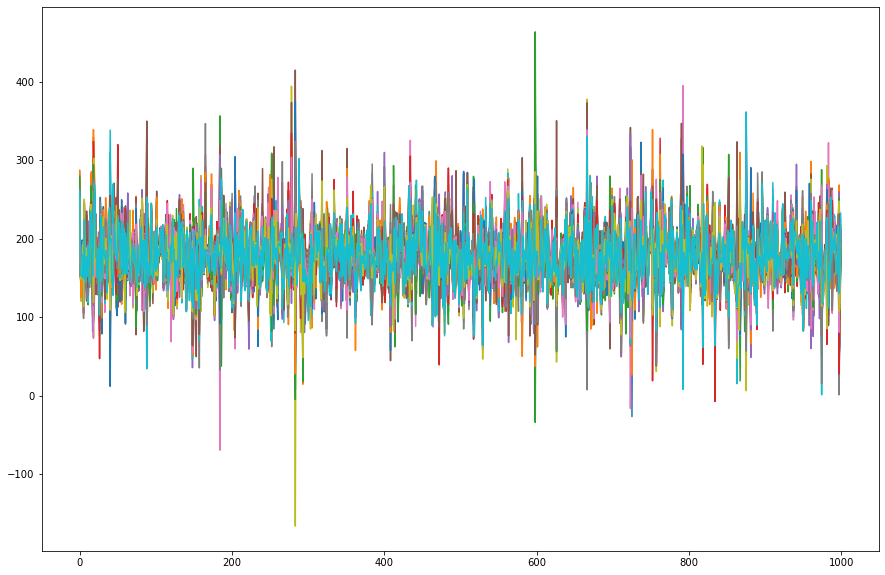

In [7]:
plt.figure(figsize=(15,10))
plt.plot(df)